In [109]:
import numpy as np
import matplotlib.pyplot as plt

### Параметры

In [110]:
R0 = 0.01
r0 = 0.01
w0 = 2
k1 = 0.8
k2 = 0.2
sigma = 0.01
timesteps = 50_000

R1 = 0.2
A = 2

### Исследуемая функция

In [111]:
def f(x, y):
    return -(x + y - 2)**4 + 2*(x + y - 2)**2 - R1 * (x + y - 2) + A

### Начальные условия

In [112]:
x, y = [0], [0]
M = [0]
phi_0 = 0
delta_x = 0
delta_y = 0

### Анимат

In [113]:
for t in range(1, timesteps + 1):
    delta_f = f(x[-1], y[-1]) - f(x[-2], y[-2]) if t > 1 else 0
    
    I = k2 * delta_f
    
    xi = np.random.normal(0, sigma)
    M_t = k1 * M[-1] + xi + I
    M.append(M_t)

    if M_t > 0:  
        # phi_0 = np.arccos(delta_x / np.sqrt(delta_x**2 + delta_y**2)) if np.sqrt(delta_x**2 + delta_y**2) != 0 else np.arccos(delta_x)
        
        delta_x = R0 * np.cos(phi_0)
        delta_y = R0 * np.sin(phi_0)

    else:  
        w = np.random.normal(0, w0)
        phi = phi_0 + w
        delta_x = r0 * np.cos(phi)
        delta_y = r0 * np.sin(phi)
        phi_0 = phi
    
    x_new = x[-1] + delta_x
    y_new = y[-1] + delta_y
    x.append(x_new)
    y.append(y_new)

Text(0.5, 1.0, 'Траектория движения анимата')

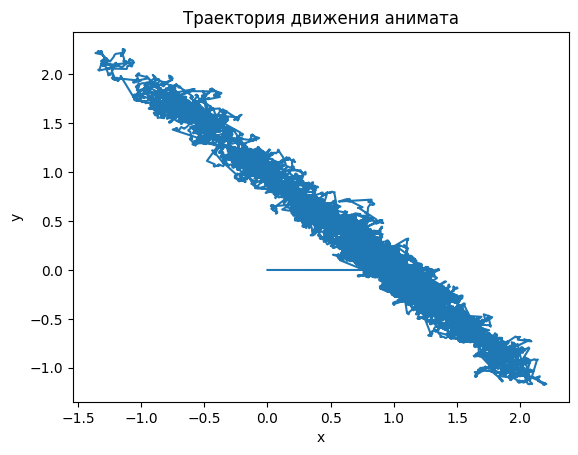

In [114]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Траектория движения анимата")

Text(0, 0.5, 'f(x,y)')

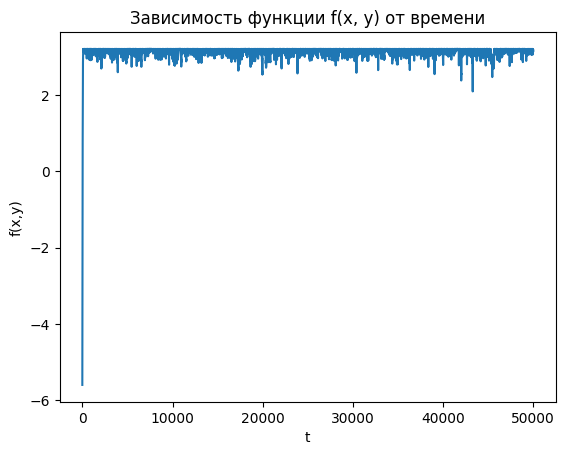

In [115]:
f_values = [f(x[i], y[i]) for i in range(len(x))]
time = range(len(f_values))
plt.plot(time, f_values)
plt.title('Зависимость функции f(x, y) от времени')
plt.xlabel('t')
plt.ylabel('f(x,y)')


Text(0, 0.5, 'M')

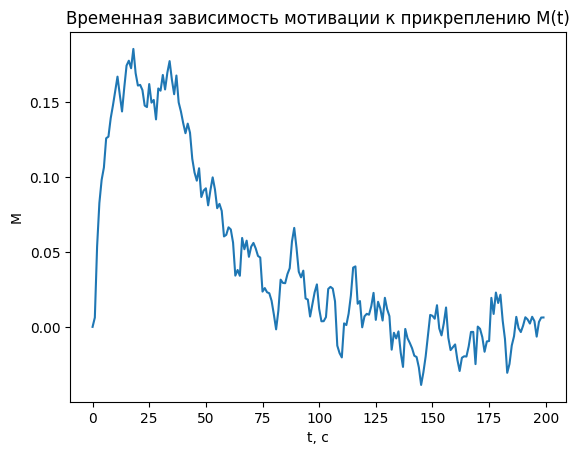

In [118]:
time = range(len(M))
plt.plot(time[:200], M[:200])
plt.title('Временная зависимость мотивации к прикреплению M(t)')
plt.xlabel('t, c')
plt.ylabel('M')

(array([ 1.,  3.,  5., 10.,  9., 11., 13., 14., 18., 12., 10.,  8.,  5.,
         7.,  1.,  3.,  7.,  5.,  3.,  0.,  1.,  4.,  1.,  4.,  3.,  3.,
         1.,  0.,  0.,  3.,  1.,  4.,  2.,  6.,  2.,  9.,  4.,  3.,  3.,
         1.]),
 array([-0.03872774, -0.03312425, -0.02752076, -0.02191727, -0.01631378,
        -0.01071028, -0.00510679,  0.0004967 ,  0.00610019,  0.01170368,
         0.01730718,  0.02291067,  0.02851416,  0.03411765,  0.03972114,
         0.04532464,  0.05092813,  0.05653162,  0.06213511,  0.0677386 ,
         0.0733421 ,  0.07894559,  0.08454908,  0.09015257,  0.09575606,
         0.10135956,  0.10696305,  0.11256654,  0.11817003,  0.12377352,
         0.12937702,  0.13498051,  0.140584  ,  0.14618749,  0.15179098,
         0.15739448,  0.16299797,  0.16860146,  0.17420495,  0.17980844,
         0.18541194]),
 <BarContainer object of 40 artists>)

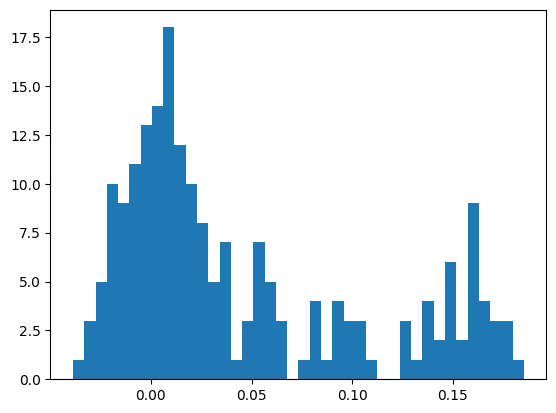

In [119]:
plt.hist(M[:200], bins=40)